<a href="https://colab.research.google.com/github/LunaTic-Neon/2025-2-DLAP/blob/main/25_2_1024_DLAP_8%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 특성 맵 시각화

In [1]:
pip install keras

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100, 100, 3), activation='relu',
                           kernel_size=(5, 5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,922 (1.15 MB)

 Trainable params: 301,922 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
ins = model.inputs
outs = model.layers[0].output
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │         2,432 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,432 (9.50 KB)

 Trainable params: 2,432 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

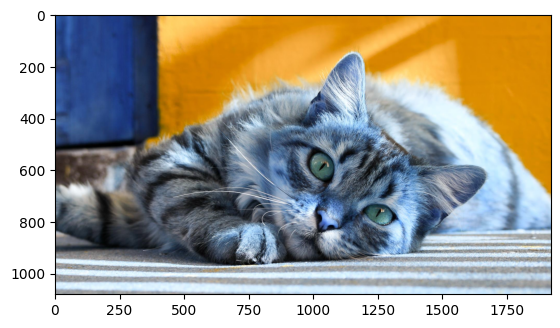

In [5]:
img = cv2.imread("/content/drive/MyDrive/6주차 데이터셋-20251024/cat.jpg")
plt.imshow(img)

(1, 100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
(1, 96, 96, 32)


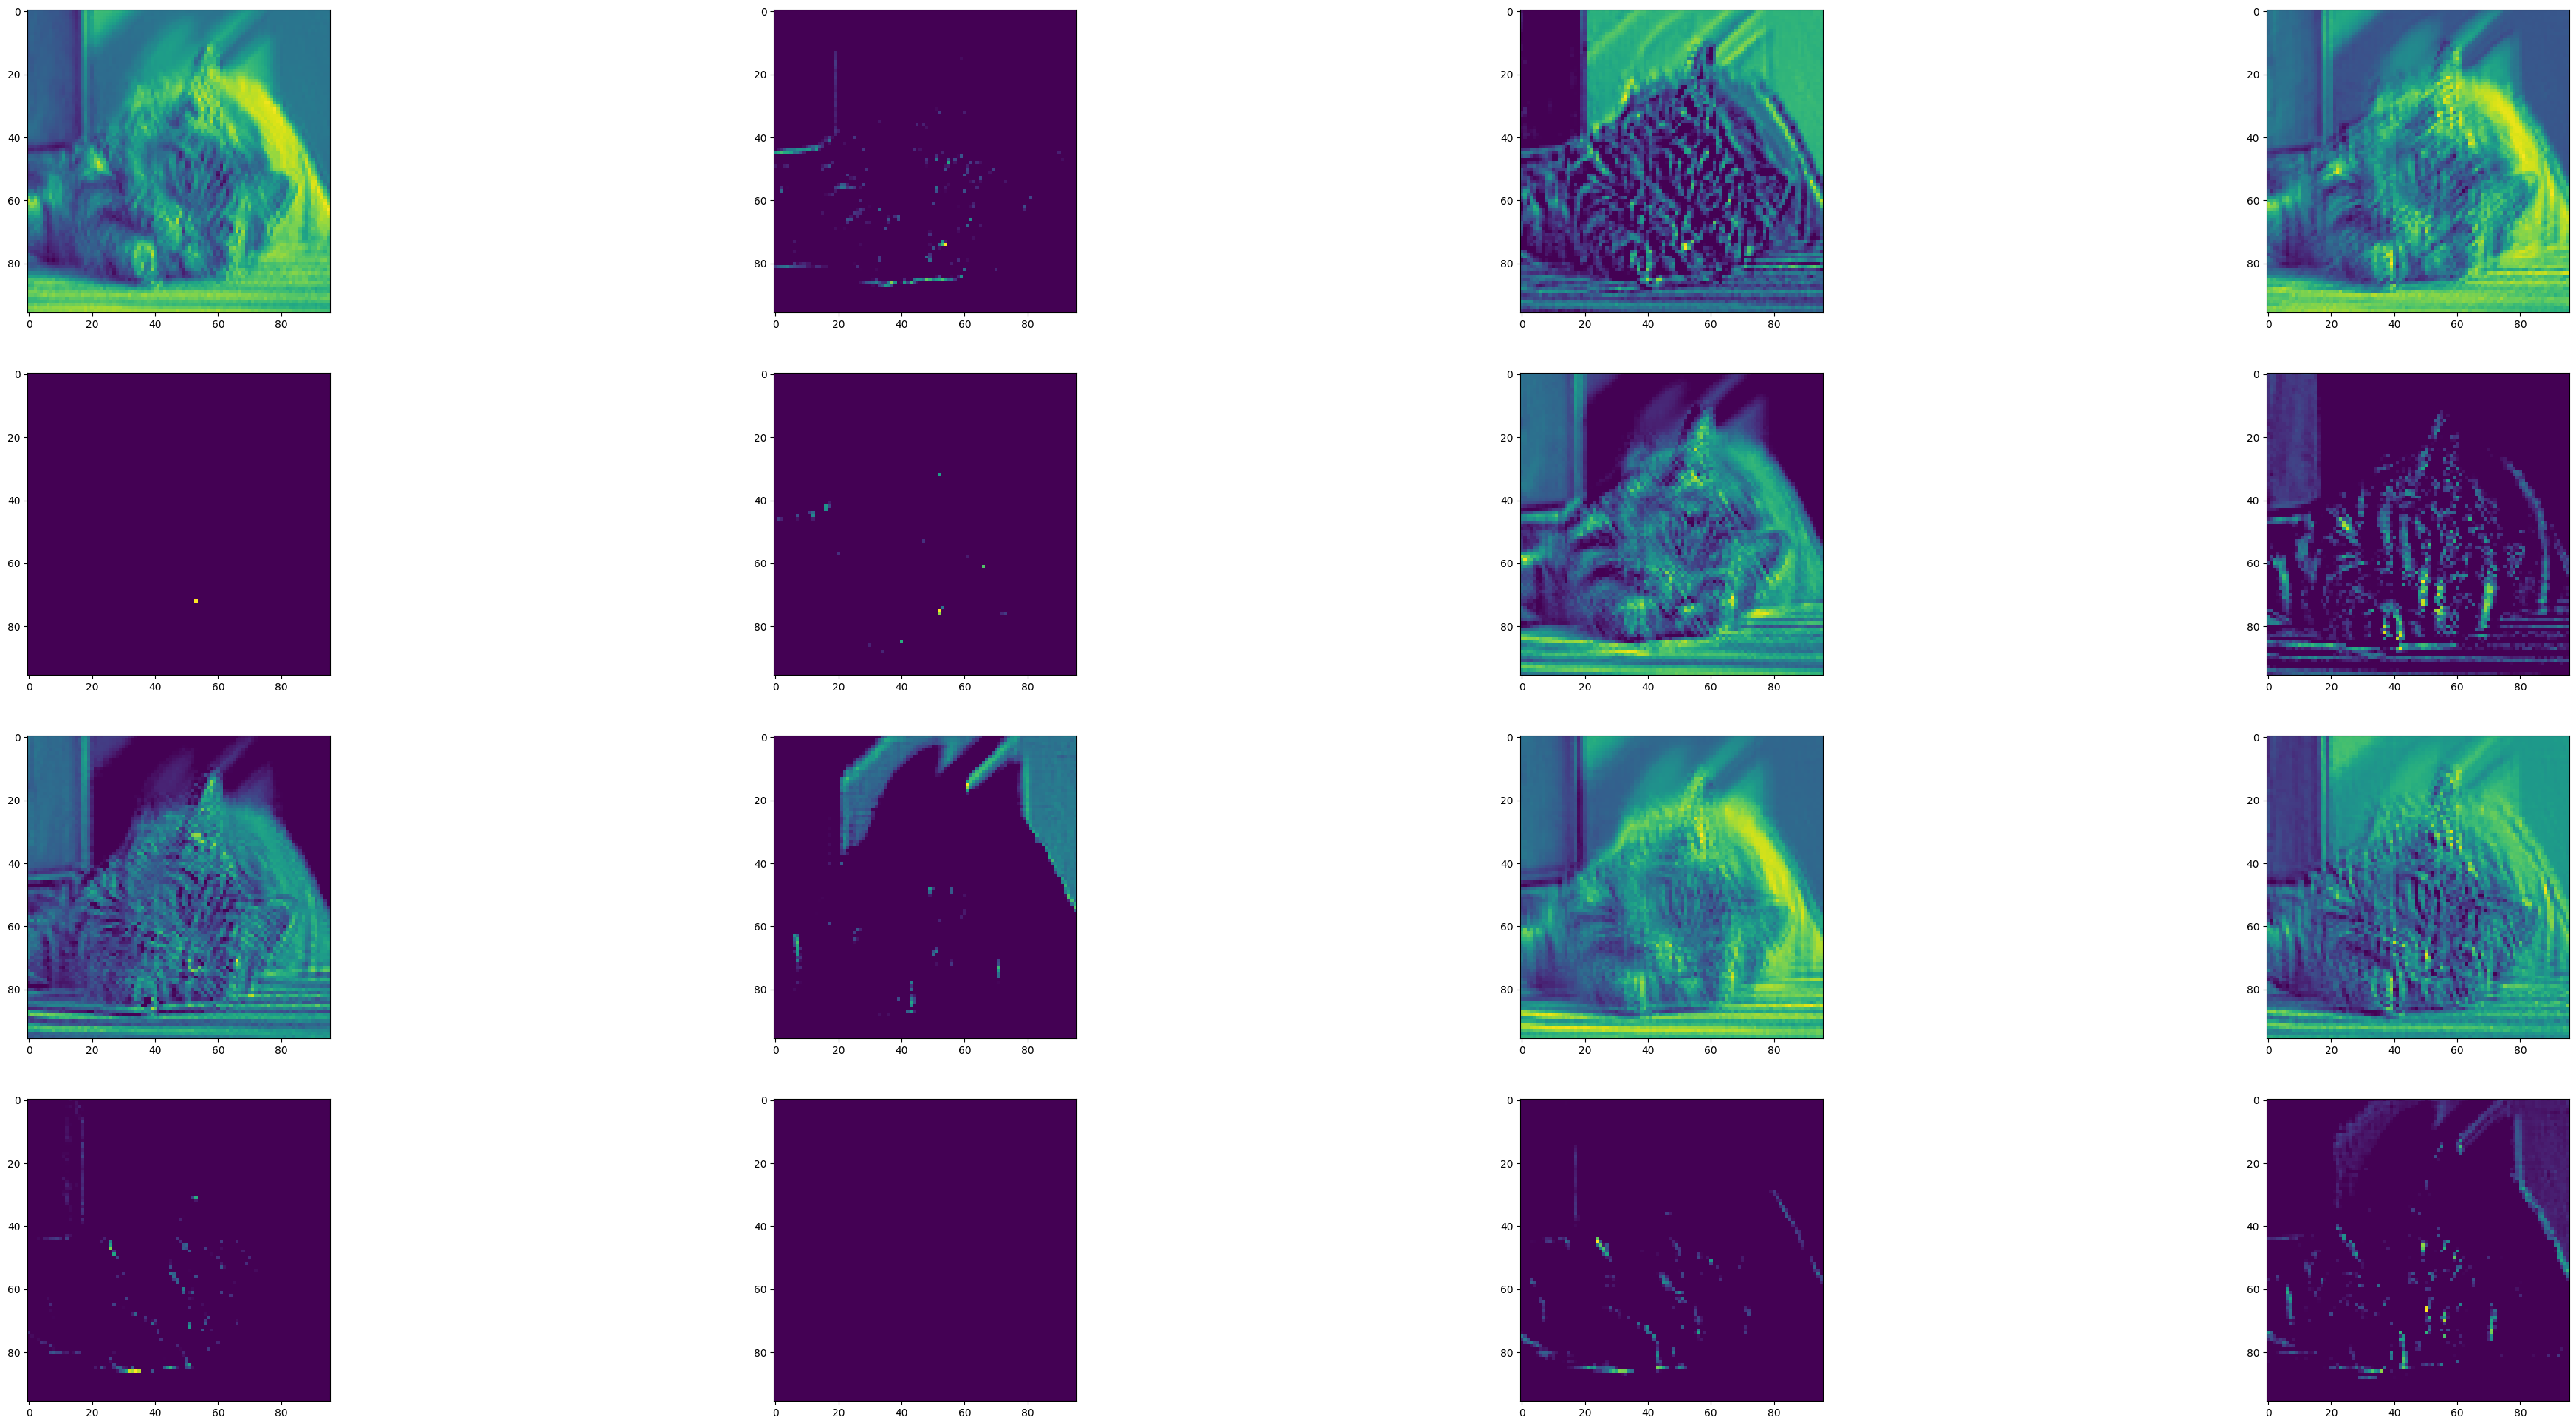

In [6]:
img = cv2.resize(img, (100, 100))
input_img = np.expand_dims(img, axis=0)
print(input_img.shape)

feature = feature_map.predict(input_img)
print(feature.shape)
fig = plt.figure(figsize=(50, 50))

for i in range(16):
    ax = fig.add_subplot(8, 4, i+1)
    ax.imshow(feature[0, :, :, i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


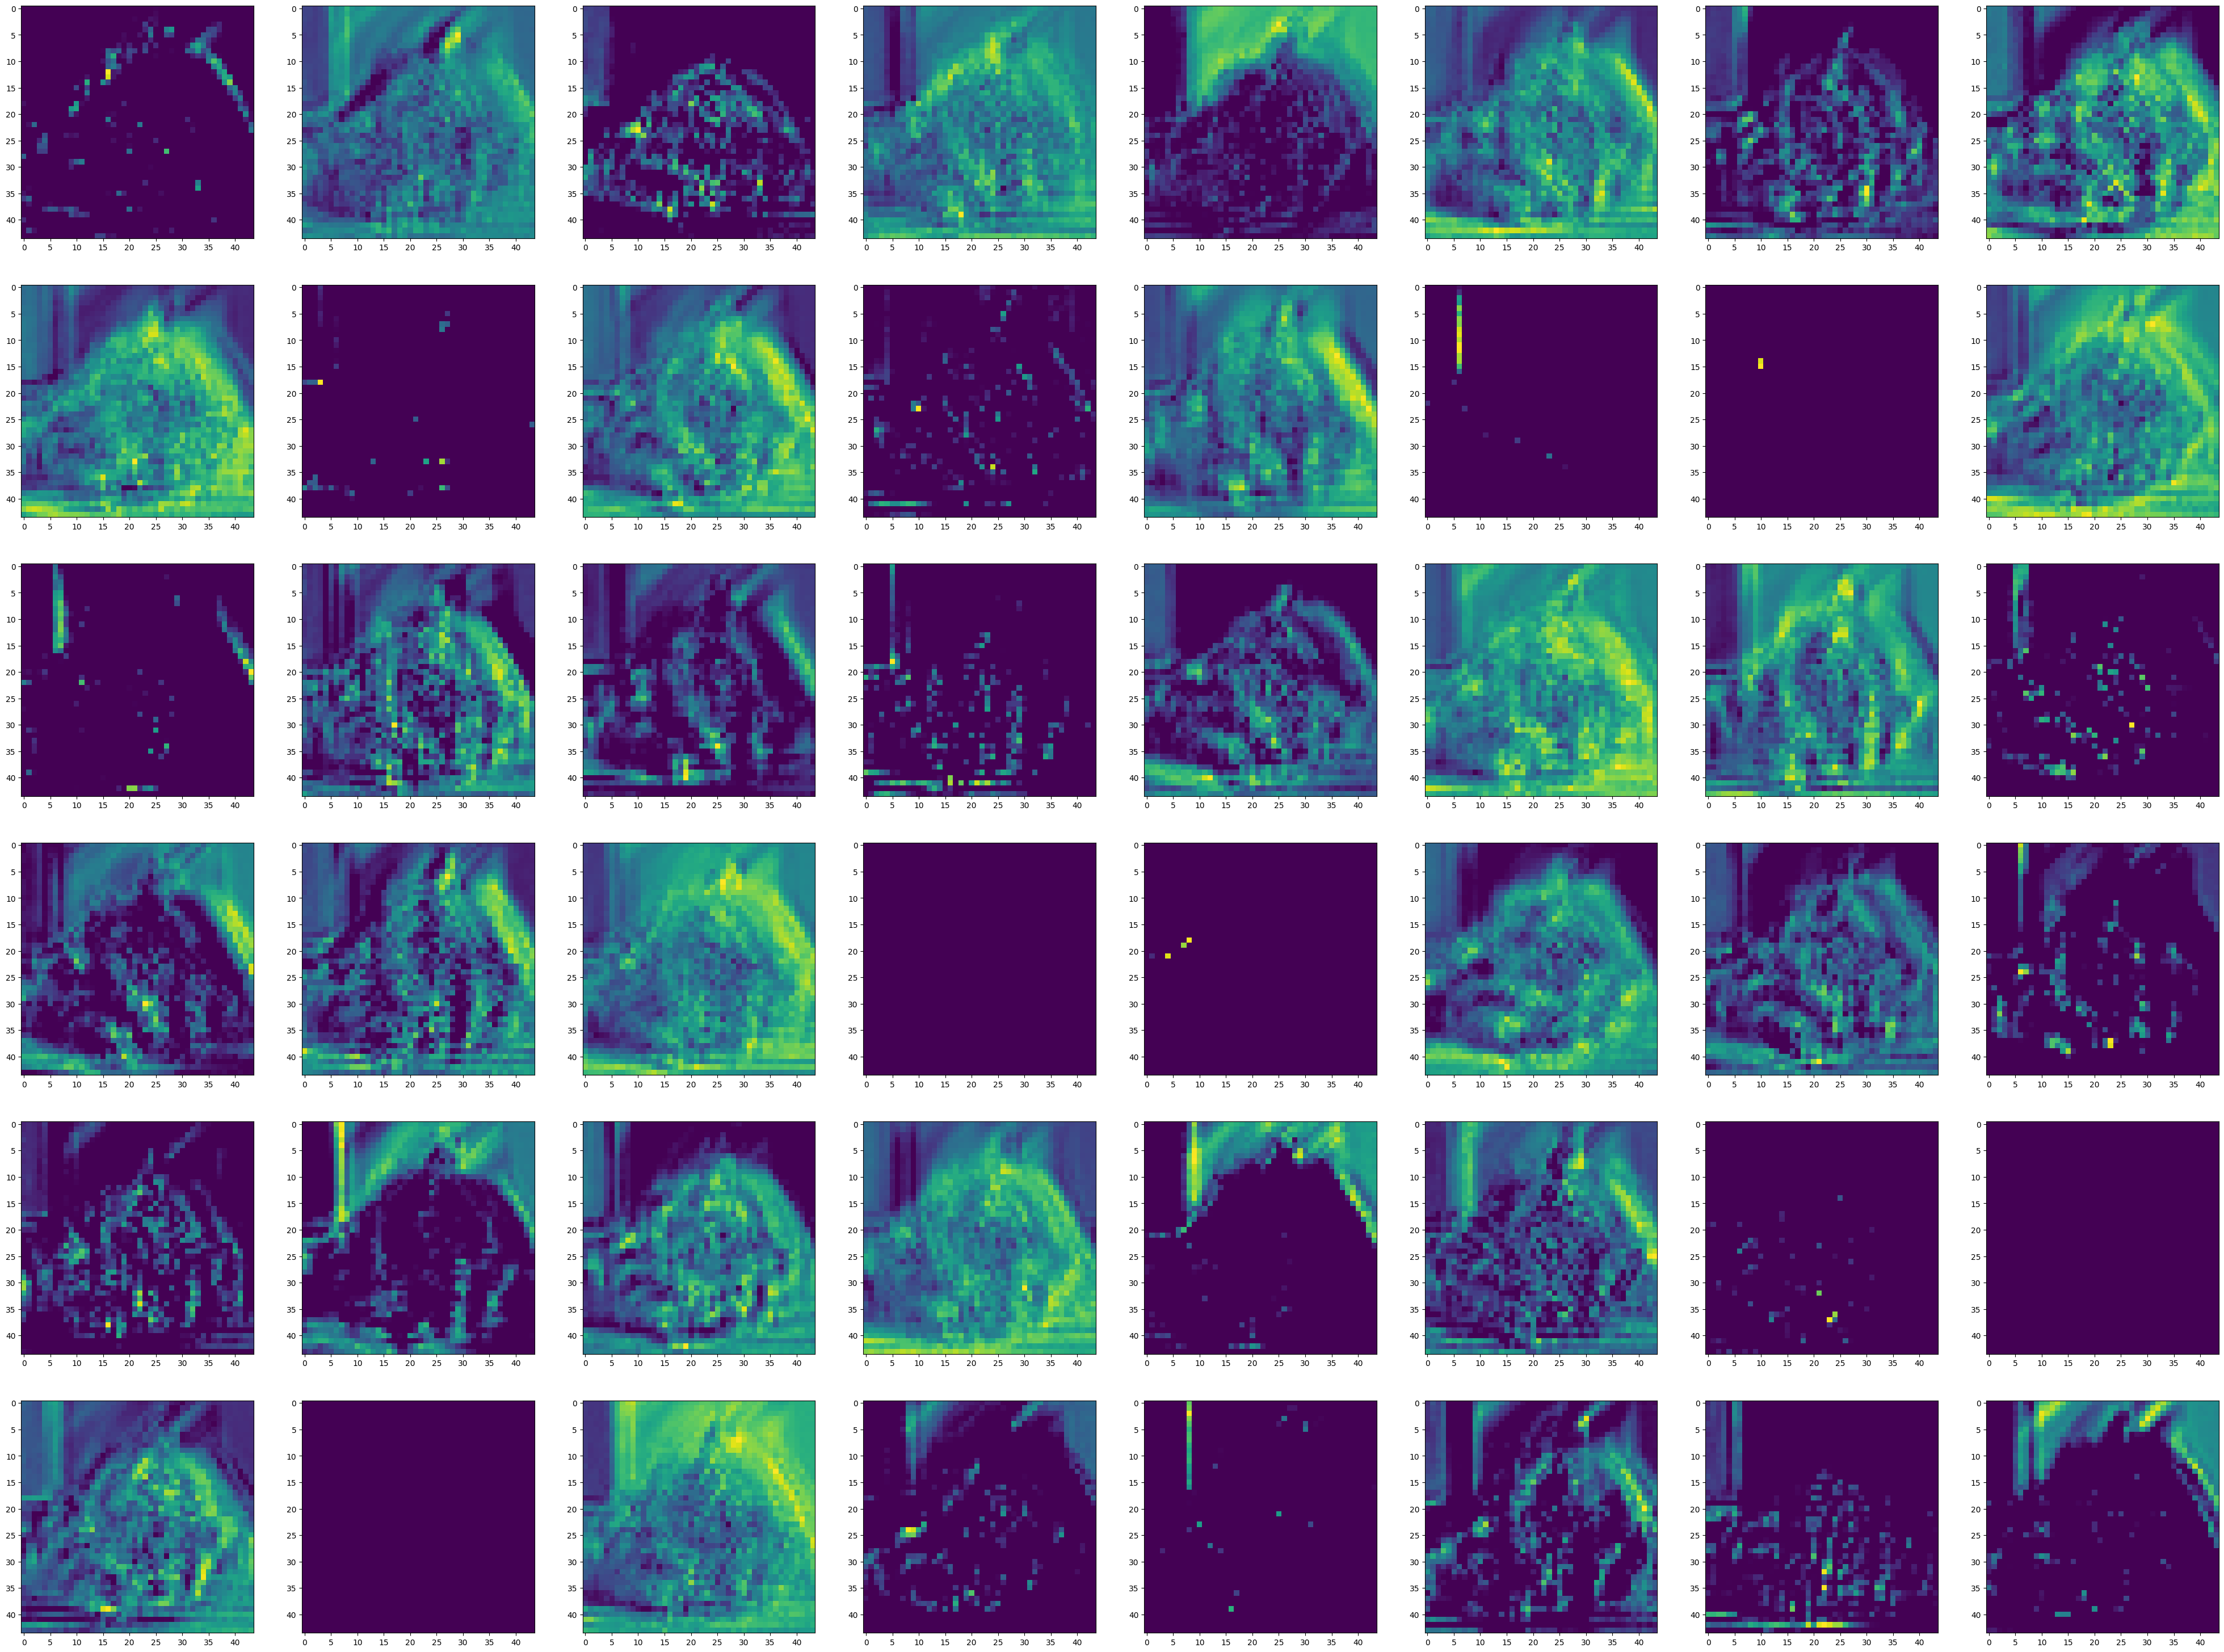

In [7]:
ins = model.inputs
outs = model.layers[2].output
feature_map = Model(inputs=ins, outputs=outs)

img = cv2.imread("/content/drive/MyDrive/6주차 데이터셋-20251024/cat.jpg")
img = cv2.resize(img, (100, 100))
input_img = np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50, 50))

for i in range(48):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(feature[0, :, :, i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


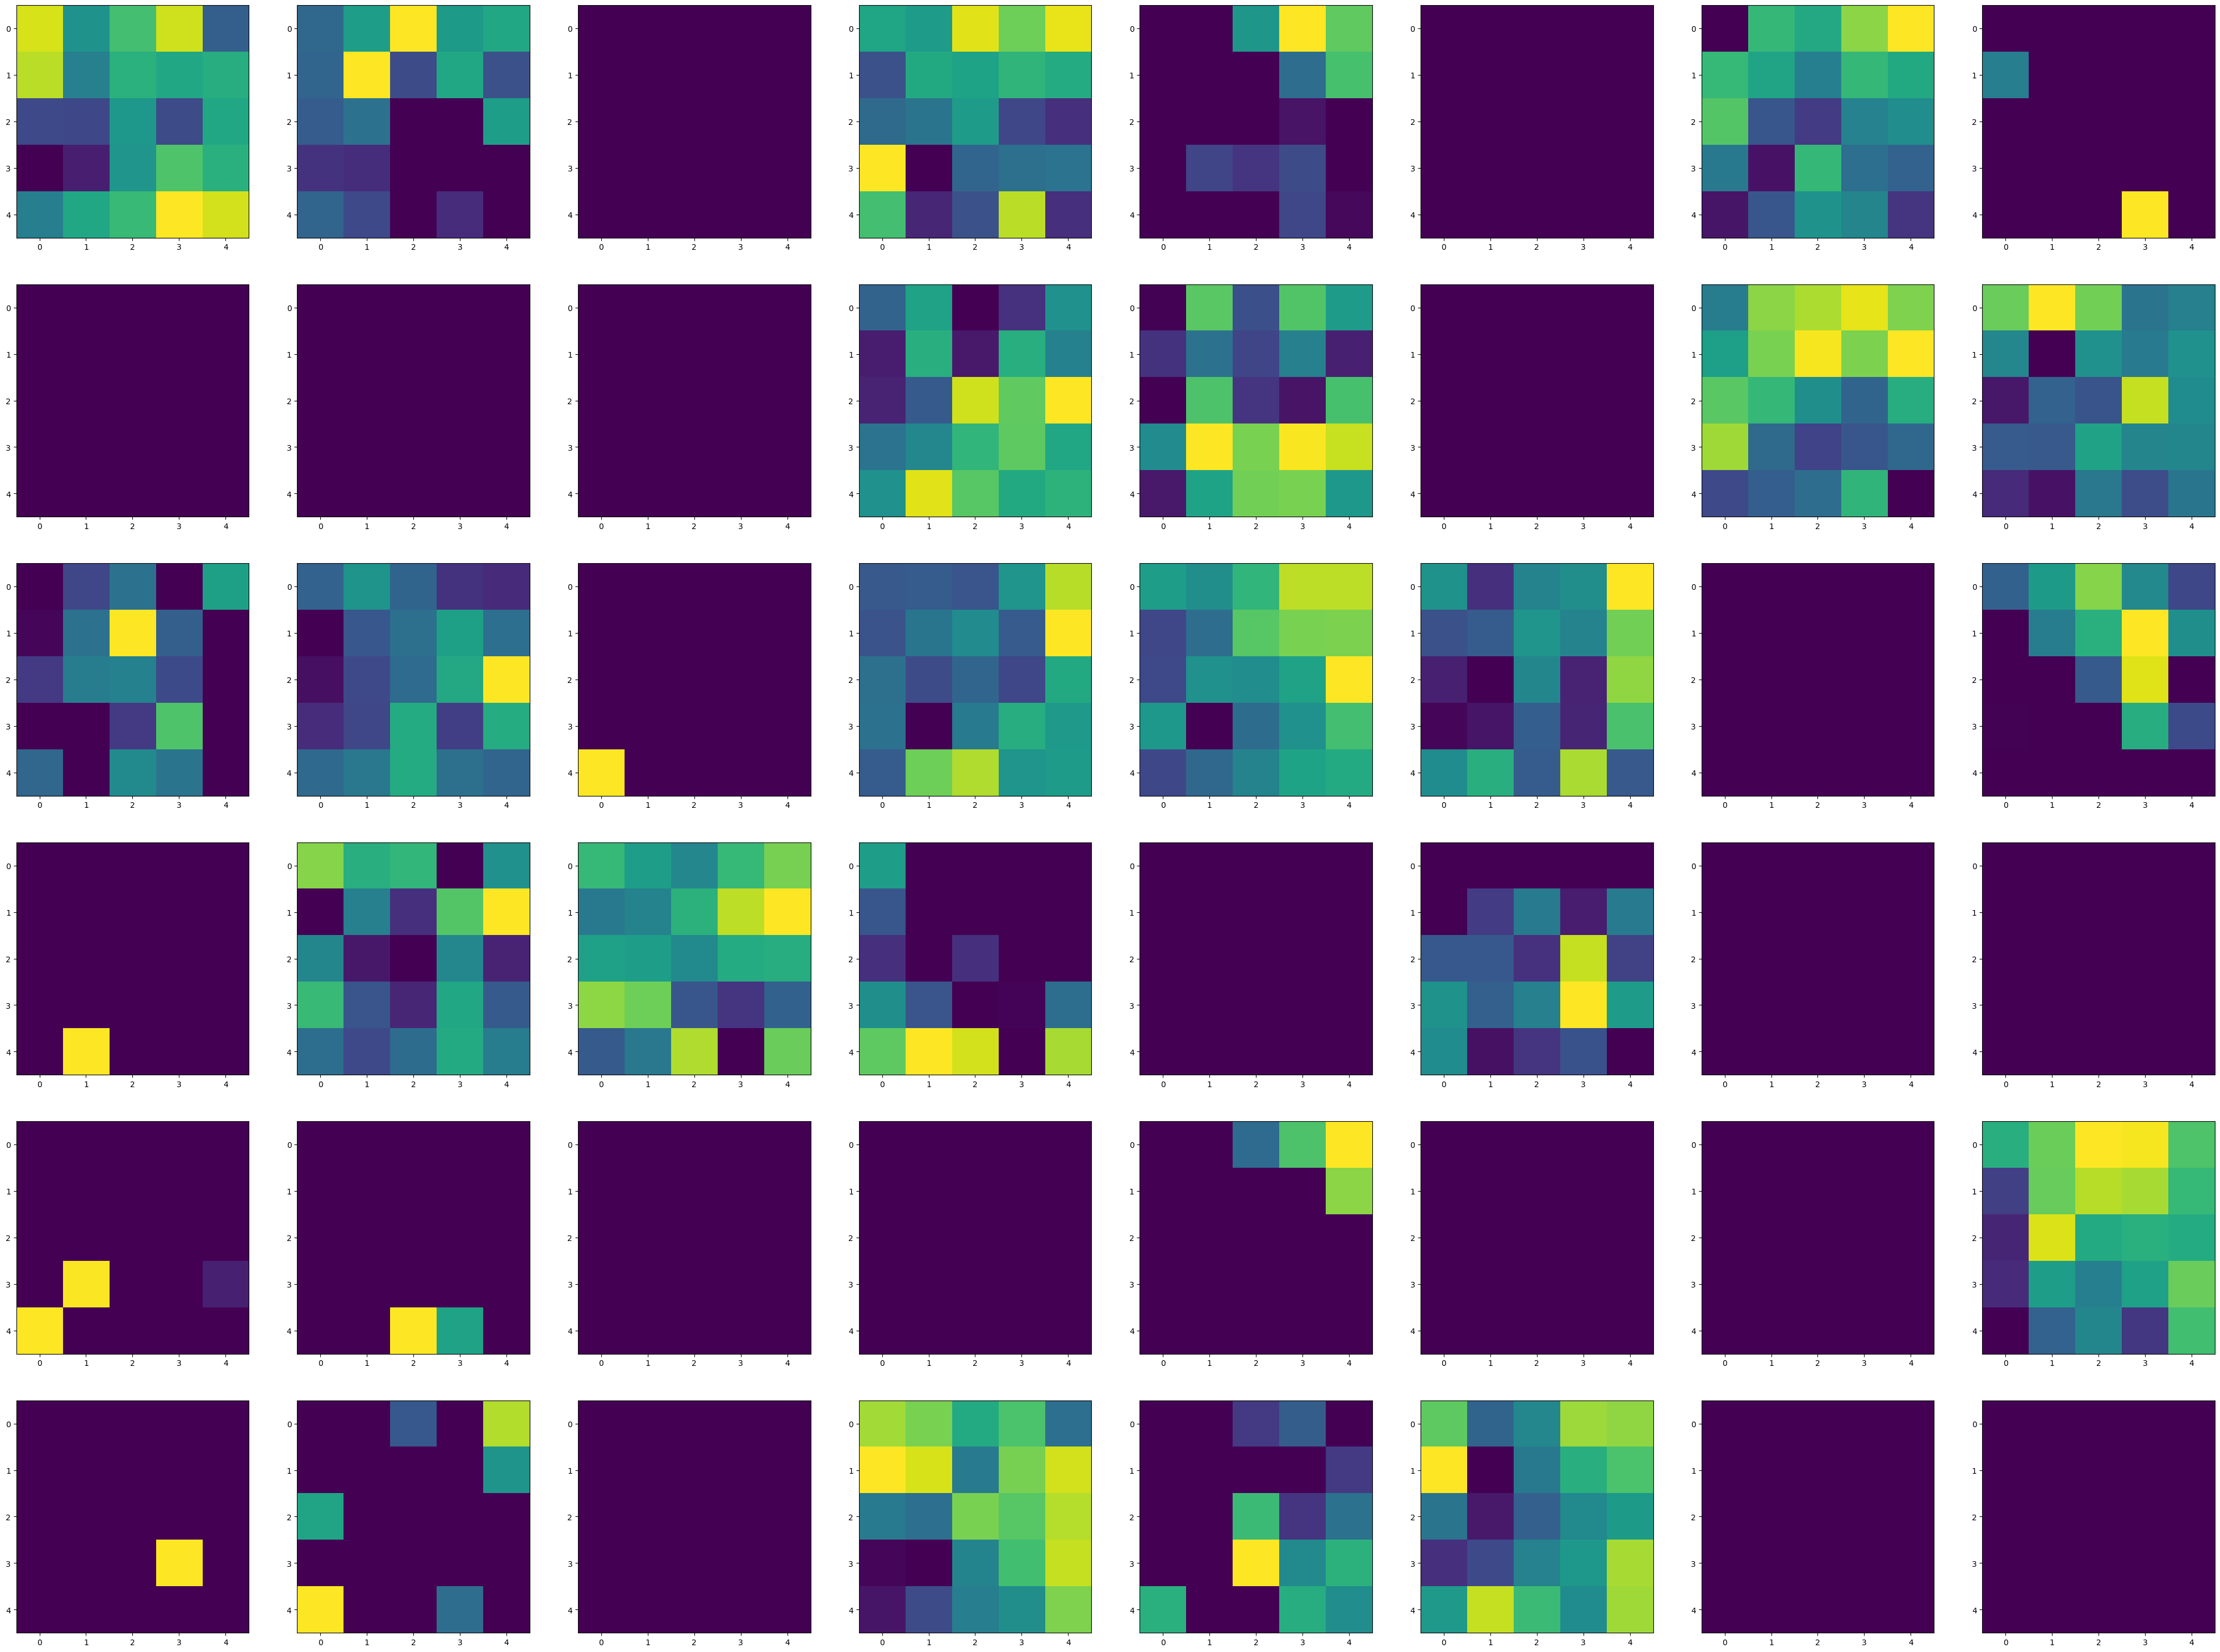

In [8]:
ins = model.inputs
outs = model.layers[6].output
feature_map = Model(inputs=ins, outputs=outs)

img = cv2.imread("/content/drive/MyDrive/6주차 데이터셋-20251024/cat.jpg")
img = cv2.resize(img, (100, 100))
input_img = np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50, 50))

for i in range(48):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(feature[0, :, :, i])

## LeNet-5

In [18]:
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
num_classes = 2

class LeNet(Sequential):
  def __init__(self, input_shape, nb_classes):
      super().__init__()

      self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu',
                      input_shape=input_shape, padding="same"))
      self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
      self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu',
                      padding='valid'))
      self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
      self.add(Flatten())
      self.add(Dense(120, activation='relu'))
      self.add(Dense(84, activation='relu'))
      self.add(Dense(nb_classes, activation='softmax'))

      self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [20]:
model = LeNet((100, 100, 3), num_classes)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "le_net_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 50, 50, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 46, 46, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 23, 23, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8464)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 120)            │     1,015,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,029,006 (3.93 MB)

 Trainable params: 1,029,006 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "/content/drive/MyDrive/6주차 데이터셋-20251024/catanddog/train"
vaild_dir = "/content/drive/MyDrive/6주차 데이터셋-20251024/catanddog/validation"

In [25]:
train = ImageDataGenerator(
          rescale=1./255,
          rotation_range=10,
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0.1,
          zoom_range=0.1)

train_generator = train.flow_from_directory(
        train_dir,
        target_size=(image_height, image_width),
        color_mode="rgb",
        batch_size=BATCH_SIZE,
        seed=1,
        shuffle=True,
        class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(vaild_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [27]:
log_dir = "/content/drive/MyDrive/6주차 데이터셋-20251024/log6-1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                      histogram_freq=1,
                                                      profile_batch=0)

model.fit(train_generator,
          steps_per_epoch=train_num // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          callbacks=[tensorboard_callback],
          verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 98s 8s/step - accuracy: 0.4966 - loss: 0.7775 - val_accuracy: 0.5000 - val_loss: 0.6914


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


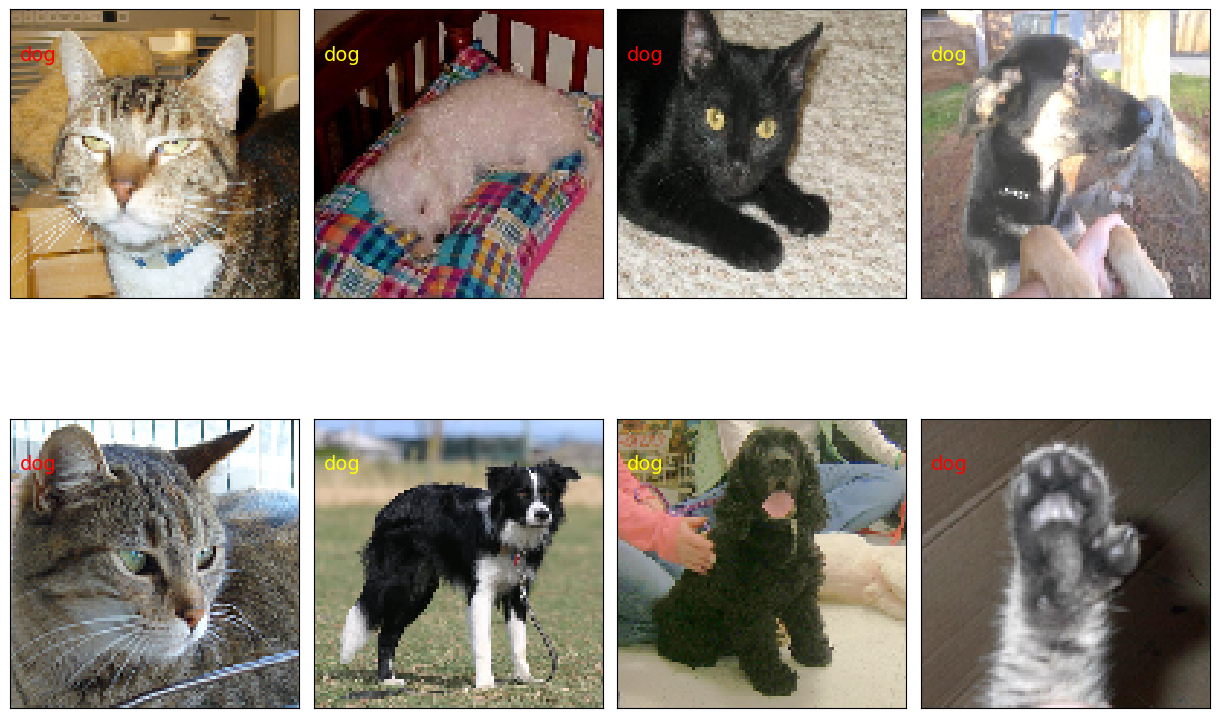

In [29]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')

    predicted_class_index = np.argmax(prediction_values[i])
    true_class_index = np.argmax(label_batch[i])

    if predicted_class_index == true_class_index:
        ax.text(3, 17, class_names[predicted_class_index], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[predicted_class_index], color='red', fontsize=14)